In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder



In [36]:
iris=load_iris()

# Convert to DataFrame for better visualization
df=pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

X=iris.data   # Features (sepal length, sepal width, petal length, petal width)
y =iris.target # Target (species)

target_names={0: "setosa", 1: "versicolor", 2: "virginica"}
y=pd.Series(y).map(target_names)



In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
print("Null values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())

Null values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Duplicated values: 1


In [39]:
df=df.drop_duplicates()
print("Duplicates removed. Remaining rows:", df.shape[0])
df.head()

Duplicates removed. Remaining rows: 149


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
svm=SVC(kernel="rbf", random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred=svm.predict(X_test_scaled)
acc=accuracy_score(y_test, y_pred)


In [42]:
print("Accuracy:",acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



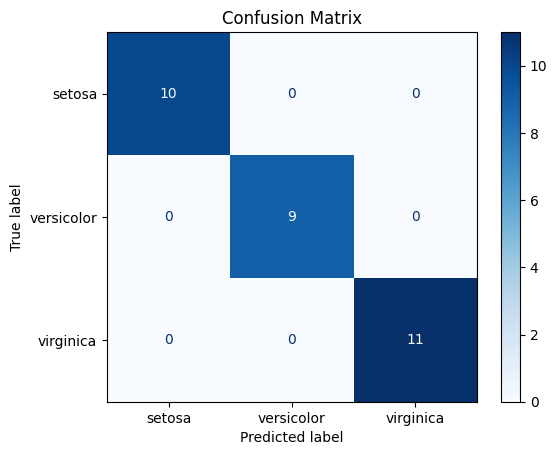

In [89]:
cm=confusion_matrix(y_test, y_pred)            #A confusion matrix is a table that shows the number of: TP,TN,FP,FN
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [69]:
sample=[[6.5, 3.0, 5.5, 2.0]] # Prediction for given input
sample_scaled=scaler.transform(sample)
predicted_class=svm.predict(sample_scaled)

# Directly take the predicted label
predicted_label=predicted_class[0]

print(f"\nPrediction for input {sample}: {predicted_label}")



Prediction for input [[6.5, 3.0, 5.5, 2.0]]: virginica


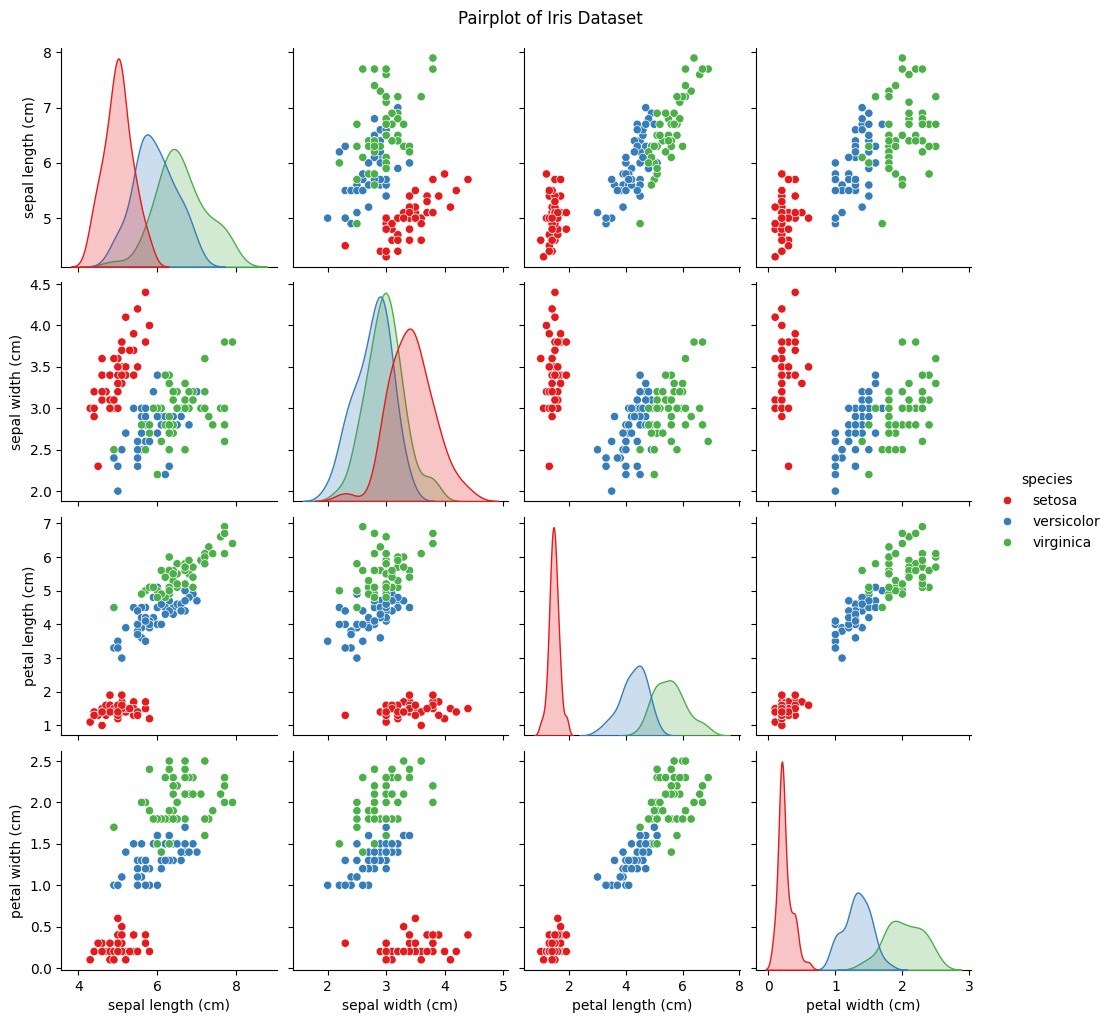

In [77]:
sns.pairplot(df, hue="species", palette="Set1")     #Uses hue="species" to color points by species.
                                                     #palette="Set1" → chooses a color scheme.

plt.suptitle("Pairplot of Iris Dataset", y=1.02)   #y=1.02 → controls the vertical position of the title.
plt.show()

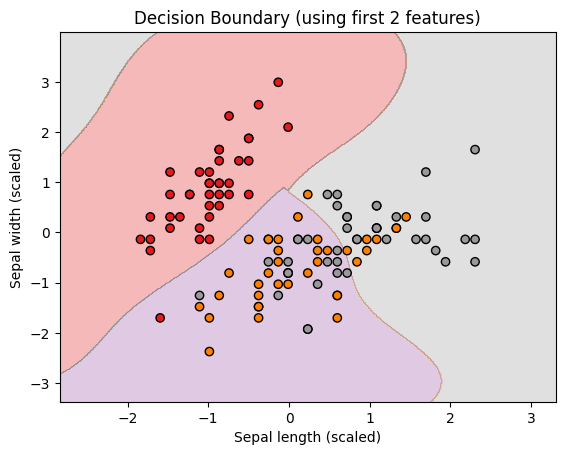

In [88]:
# Use only first 2 features
X_vis=X_train_scaled[:, :2]

# Train SVM
svm_model_vis=SVC(kernel='rbf')
svm_model_vis.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max=X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max=X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy=np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict class for each grid point
Z=svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert Z (string labels) to numeric for contourf
le=LabelEncoder()
le.fit(y_train)        # Fit encoder on training labels
Z_numeric=le.transform(Z)
Z_numeric=Z_numeric.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.Set1)

# Convert training labels to numeric for scatter
y_numeric=le.transform(y_train)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_numeric, edgecolors="k", cmap=plt.cm.Set1)
plt.title("Decision Boundary (using first 2 features)")
plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.show()